# Portfolio Optimization Using Modern Portfolio Theory (MPT)

### Goal of the Project:
In this project, we aim to create an optimal portfolio of stocks using **Modern Portfolio Theory (MPT)**. MPT helps investors maximize returns for a given level of risk by carefully selecting the proportions of different assets. We will also visualize the **Efficient Frontier**, which shows the portfolios that offer the highest return for each level of risk.

### Why Portfolio Optimization?
Investors need to balance risk and return when choosing how to allocate their investments. A portfolio can be optimized to either:
1. **Maximize returns for a given risk**, or
2. **Minimize risk for a given return**.

Modern Portfolio Theory provides the mathematical framework to achieve this balance, giving investors a structured way to make investment decisions.

### Approach:
1. **Fetch Historical Data**: We will use **yfinance** to download the stock prices of several assets.
2. **Calculate Returns and Risk (Volatility)**: Use these prices to calculate the daily returns and risk.
3. **Monte Carlo Simulation**: Generate thousands of random portfolios to understand the relationship between different assets.
4. **Efficient Frontier**: Identify the portfolios that maximize returns for a given risk level, and plot the Efficient Frontier.
5. **Sharpe Ratio**: Optimize the portfolio by maximizing the **Sharpe Ratio**, which measures return relative to risk.

Through this structured approach, you will learn how to construct an optimized portfolio using both theoretical and practical methods.

# Step 1: Import necessary libraries
We will use the following libraries:
- **yfinance**: To fetch historical stock data.
- **NumPy**: For numerical computations.
- **Pandas**: To manipulate the data in DataFrame format.
- **Matplotlib**: To visualize stock performance and the Efficient Frontier.
- **scikit-learn**: For data preprocessing and statistical operations.

Let’s start by importing the libraries and fetching the historical stock data.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize
from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
# Define the stock symbols we will analyze
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Fetch the stock data from Yahoo Finance for the last 5 years
data = yf.download(stocks, start='2019-01-01', end='2024-01-01')['Adj Close']

# Display the first few rows of the dataset
data.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2019-01-02,37.750084,76.956497,52.603748,95.501343,20.674667
2019-01-03,33.989891,75.014000,51.146851,91.988029,20.024000
2019-01-04,35.440903,78.769501,53.770355,96.266304,21.179333
2019-01-07,35.362015,81.475502,53.663124,96.389091,22.330667
2019-01-08,36.036140,82.829002,54.134457,97.087967,22.356667


# Step 2: Calculating Daily Returns and Risk (Volatility)
Before we optimize our portfolio, we need to calculate the **daily returns** and **risk** (or volatility) of each stock. This allows us to understand how each stock has performed historically.

### Key Concepts:
1. **Daily Returns**: The percentage change in the price of a stock from one day to the next. It is calculated as:  
   $$ \text{Return}_t = \frac{\text{Price}_t - \text{Price}_{t-1}}{\text{Price}_{t-1}} $$
2. **Volatility (Risk)**: The standard deviation of the stock's returns. Higher volatility means more risk.

We will calculate these metrics for each stock in our portfolio.

In [19]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Display the first few rows of the returns dataset
returns.head()

# Calculate the annualized mean return and the annualized volatility (standard deviation)
annual_returns = returns.mean() * 252  # 252 trading days in a year
annual_volatility = returns.std() * np.sqrt(252)

# Display annualized returns and volatility
annual_returns, annual_volatility

(Ticker
 AAPL     0.378031
 AMZN     0.198360
 GOOGL    0.245988
 MSFT     0.320295
 TSLA     0.708129
 dtype: float64,
 Ticker
 AAPL     0.322345
 AMZN     0.352214
 GOOGL    0.318100
 MSFT     0.304908
 TSLA     0.647000
 dtype: float64)

# Step 3: Monte Carlo Simulation
To understand the relationship between risk and return, we will generate **thousands of random portfolios** by assigning random weights to each stock.

### Key Concepts:
1. **Portfolio Return**: The weighted sum of the returns of each stock in the portfolio.
2. **Portfolio Risk (Volatility)**: The portfolio's risk is not just the weighted sum of the individual risks; it also depends on the **correlation** between the stocks.

The formula for **Portfolio Return** is:
$$ R_{\text{portfolio}} = \sum_{i=1}^{n} w_i R_i $$

The formula for **Portfolio Risk** (variance) is:
$$ \sigma_{\text{portfolio}} = \sqrt{\sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \text{Cov}(R_i, R_j)} $$

Where:
- $R_i$ is the return of asset $i$,
- $w_i$ is the weight of asset $i$ in the portfolio,
- $\text{Cov}(R_i, R_j)$ is the covariance between the returns of assets $i$ and $j$.

We will simulate random portfolios and calculate their return, risk, and **Sharpe Ratio**.

In [20]:
# Number of portfolios to simulate
num_portfolios = 10000

# Create empty lists to store portfolio returns, volatility, and weights
all_weights = []
portfolio_returns = []
portfolio_volatility = []
sharpe_ratios = []

# Risk-free rate for Sharpe ratio calculation (example: 2% or 0.02)
risk_free_rate = 0.02

# Loop through to create random portfolios
for _ in range(num_portfolios):
    # Generate random weights for the stocks (sum of weights = 1)
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    # Calculate portfolio return
    portfolio_return = np.sum(weights * annual_returns)
    
    # Calculate portfolio risk (volatility)
    portfolio_variance = np.dot(weights.T, np.dot(returns.cov() * 252, weights))
    portfolio_std = np.sqrt(portfolio_variance)
    
    # Calculate the Sharpe Ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
    
    # Append the results to the lists
    all_weights.append(weights)
    portfolio_returns.append(portfolio_return)
    portfolio_volatility.append(portfolio_std)
    sharpe_ratios.append(sharpe_ratio)

# Convert lists to numpy arrays
portfolio_returns = np.array(portfolio_returns)
portfolio_volatility = np.array(portfolio_volatility)
sharpe_ratios = np.array(sharpe_ratios)

# Display the first simulated portfolio (for demonstration purposes)
print("First Portfolio Weights:", all_weights[0])
print("Return:", portfolio_returns[0])
print("Volatility:", portfolio_volatility[0])
print("Sharpe Ratio:", sharpe_ratios[0])

First Portfolio Weights: [0.31833832 0.26429432 0.04724271 0.1512396  0.21888505]
Return: 0.38782844899691843
Volatility: 0.3238239103950564
Sharpe Ratio: 1.1358903317181788


# Step 4: Visualizing the Efficient Frontier
The **Efficient Frontier** is a curve that shows the optimal portfolios for a given level of risk. These portfolios offer the highest expected return for each level of risk.

We will plot the random portfolios generated from the Monte Carlo simulation and highlight the portfolios with the **maximum Sharpe Ratio** and **minimum risk**.

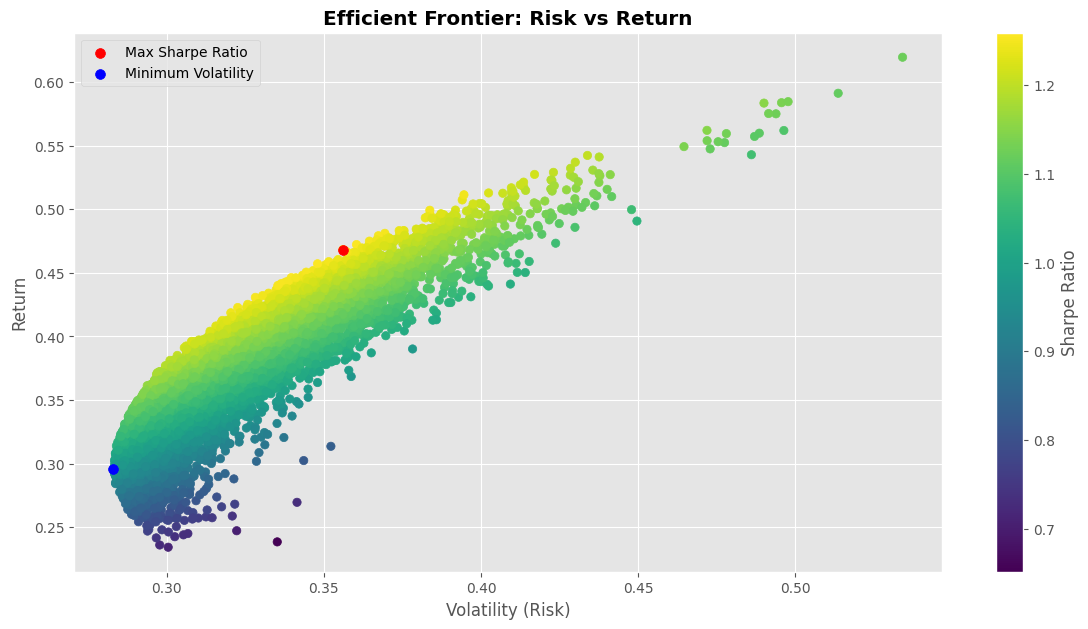

In [23]:
# Plot the efficient frontier
plt.figure(figsize=(14,7))
plt.style.use('ggplot')
plt.scatter(portfolio_volatility, portfolio_returns, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier: Risk vs Return', fontweight='bold')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')

# Highlight the portfolio with the maximum Sharpe Ratio
max_sharpe_idx = sharpe_ratios.argmax()
plt.scatter(portfolio_volatility[max_sharpe_idx], portfolio_returns[max_sharpe_idx], c='red', s=50, label='Max Sharpe Ratio')

# Highlight the portfolio with the minimum volatility
min_volatility_idx = portfolio_volatility.argmin()
plt.scatter(portfolio_volatility[min_volatility_idx], portfolio_returns[min_volatility_idx], c='blue', s=50, label='Minimum Volatility')

plt.legend(loc='upper left')
plt.show()

# Step 5: Finding the Optimal Portfolio
While Monte Carlo simulation gives us a good understanding of the risk-return relationship, we can also **mathematically optimize** the portfolio. 

We will maximize the **Sharpe Ratio** using **scipy's minimize function**, which solves constrained optimization problems.

In [22]:
# Function to calculate portfolio performance (return and volatility) for given weights
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.sum(weights * returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std = np.sqrt(portfolio_variance)
    return portfolio_return, portfolio_std

# Negative Sharpe Ratio function (since we minimize it)
def neg_sharpe(weights, returns, cov_matrix, risk_free_rate=0.02):
    portfolio_return, portfolio_std = portfolio_performance(weights, returns, cov_matrix)
    return -(portfolio_return - risk_free_rate) / portfolio_std

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for weights (between 0 and 1)
bounds = tuple((0, 1) for _ in range(len(stocks)))

# Initial guess (equal weights)
initial_guess = np.array([1/len(stocks)] * len(stocks))

# Optimize the portfolio for maximum Sharpe Ratio
cov_matrix = returns.cov() * 252
optimal_result = minimize(neg_sharpe, initial_guess, args=(annual_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = optimal_result.x
optimal_weights

array([5.34648509e-01, 3.23338770e-17, 0.00000000e+00, 1.85798703e-01,
       2.79552788e-01])

# Conclusion
In this notebook, we explored **Modern Portfolio Theory** and used it to build an optimized stock portfolio. We used:
1. **Monte Carlo Simulation** to generate random portfolios and understand the risk-return relationship.
2. **Efficient Frontier** to visualize the set of portfolios offering the best returns for a given level of risk.
3. **Sharpe Ratio Optimization** to mathematically find the optimal portfolio.

This approach demonstrates a practical application of quantitative finance using Python, highlighting both theoretical and computational methods for portfolio optimization.